<a href="https://colab.research.google.com/github/offthetab/ML_homework/blob/main/%D0%9F%D0%A0_6_%D0%9E%D1%82%D0%B1%D0%BE%D1%80_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from xgboost import XGBClassifier

!pip install shap
import shap

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pavelgrom123123","key":"5b5eca0ee512a4fa89c0a9ee3270f23f"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download 'rishikeshkonapure/home-loan-approval' --force

  0% 0.00/12.6k [00:00<?, ?B/s]
100% 12.6k/12.6k [00:00<00:00, 24.9MB/s]


In [ ]:
!unzip home-loan-approval.zip

Archive:  home-loan-approval.zip
replace loan_sanction_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# read train and test data
data_train = pd.read_csv("loan_sanction_train.csv")

# removing ID column from train and test datasets
data_train = data_train.drop(['Loan_ID'], axis=1)

# output datasets shapes
print("train dataset shape:", data_train.shape)


train dataset shape: (614, 12)


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
data_train.dropna(inplace=True) # delete all nan from training dataset

print("train dataset shape:", data_train.shape)


train dataset shape: (480, 12)


In [ ]:
data_train.Loan_Status.value_counts()

# 1 - loan approved. 0 - not
# дизбаланс классов не наблюдается, так как присутсвует примерно одинаковое кол-во "1" и "0"

Y    332
N    148
Name: Loan_Status, dtype: int64

In [ ]:
object_ = data_train.select_dtypes(include='object').columns  # all object cols to encode
nums_ = data_train.select_dtypes(exclude='object').columns  # all num cols

encode = LabelEncoder() # sklearn label encder

#  encoding
for i, obj in enumerate(object_):
  encode.fit(data_train[obj])
  data_train[obj] = encode.transform(data_train[obj])


In [ ]:
# тут проводим стандартизацию

scaler = StandardScaler()
features_ = data_train.iloc[:, :-1]

# выбираем стандартизированные данные
#features_ = pd.DataFrame(data=scaler.fit_transform(features_), columns=features_.columns)

# следующая строка чтобы фичи были не стандартизованны (для тестов)
features_ = pd.DataFrame(data=features_, columns=features_.columns)

target_ = data_train.iloc[:, -1]

In [ ]:
target_.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [ ]:
features_.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000


In [ ]:
#разделить на обучающую и тестовую выборки
# features_
# target_


X_train, X_test, y_train, y_test = train_test_split(
    features_,
    target_,
    test_size=0.3,
    random_state=1,
    shuffle=True
)

#1. Построить линейную модель и оценить значимость признаков, используя p-value или веса, а также на основе жадного алгоритма.

# Построить модель с Lasso-регуляризацией (чем больше alpha, тем больше может признаков занулится), оценить значимость признаков.

In [ ]:
# Строим линейную модель и оцением значимость признаков по p-value. Чем он меньше, тем более значим признак.
# Так же, если Если 0 входит в доверительный интервал, то признак не значим.

# для регрессии применять sm.OLS. И fit_regularized, если нужна регуляризация

# Статья для понимания summary https://habr.com/ru/articles/681218/

log_red_no_reg = sm.Logit(y_train.values.reshape(-1,1), X_train)
res_no_reg = log_red_no_reg.fit()

print(res_no_reg.summary())

Optimization terminated successfully.
         Current function value: 0.441631
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  336
Model:                          Logit   Df Residuals:                      325
Method:                           MLE   Df Model:                           10
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.2651
Time:                        00:52:29   Log-Likelihood:                -148.39
converged:                       True   LL-Null:                       -201.93
Covariance Type:            nonrobust   LLR p-value:                 2.068e-18
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender               -0.0807      0.408     -0.198      0.843      -0.880       0.719
Married 

In [ ]:
# lasso
log_red = sm.Logit(y_train.values.reshape(-1,1), X_train)
res = log_red.fit_regularized(method='l1', alpha=0.9)

print(res.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.45571147107582727
            Iterations: 61
            Function evaluations: 83
            Gradient evaluations: 61
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  336
Model:                          Logit   Df Residuals:                      325
Method:                           MLE   Df Model:                           10
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.2636
Time:                        00:52:29   Log-Likelihood:                -148.69
converged:                       True   LL-Null:                       -201.93
Covariance Type:            nonrobust   LLR p-value:                 2.737e-18
                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
# Окенка признаков по весам без применения регуляризации (пока я не понимаю почему statmodel регуляриция плохо обнуляет веса)

LG = LogisticRegression()
LG.fit(X_train, y_train)
y_pred = LG.predict(X_test)


LG_weights = pd.DataFrame({'columns': X_test.columns.to_numpy(), 'weights': LG.coef_[0]})
LG_weights

,columns,weights
0,Gender,0.214898
1,Married,0.847670
2,Dependents,-0.006134
3,Education,-0.410129
4,Self_Employed,-0.139476
5,ApplicantIncome,0.000009
6,CoapplicantIncome,-0.000108
7,LoanAmount,-0.003250
8,Loan_Amount_Term,-0.004904
9,Credit_History,2.634513


In [ ]:
# Окенка признаков по весам с L1 регуляризацей

np.set_printoptions(suppress=True)

LG_lasso = LogisticRegression(random_state=1, penalty='l1', solver='liblinear', C=0.1)
LG_lasso.fit(X_train, y_train)
y_pred = LG_lasso.predict(X_test)


LG_lasso_weights = pd.DataFrame({'columns': X_test.columns.to_numpy(), 'weights': LG_lasso.coef_[0]})
LG_lasso_weights

,columns,weights
0,Gender,0.000000
1,Married,0.018518
2,Dependents,0.054000
3,Education,0.000000
4,Self_Employed,0.000000
5,ApplicantIncome,0.000004
6,CoapplicantIncome,-0.000068
7,LoanAmount,-0.001917
8,Loan_Amount_Term,-0.001253
9,Credit_History,1.981188


In [ ]:
# Оценка значимости признаков на основе жадного алгоритма. Используем линейную модель (LinearRegression для задачи регрессии или LogisticRegression для классификации)

LG = LogisticRegression()
sfs = SequentialFeatureSelector(LG, scoring='recall_macro') # для оценки используем recall_macro так как есть дизбиланс и хочется сделать упор на меньший класс и хотим отсеять всех плохих заемщиков
sfs.fit(X_train, y_train)

print("Выбранные призанки:", sfs.get_feature_names_out(), "\n")



log_red_no_reg = sm.Logit(y_train.values.reshape(-1,1), X_train[['Gender', 'Dependents','Education','CoapplicantIncome','Credit_History']])
res_no_reg = log_red_no_reg.fit()

print(res_no_reg.summary())

Выбранные призанки: ['Gender' 'Dependents' 'CoapplicantIncome' 'LoanAmount' 'Credit_History'] 

Optimization terminated successfully.
         Current function value: 0.485891
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  336
Model:                          Logit   Df Residuals:                      331
Method:                           MLE   Df Model:                            4
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.1915
Time:                        00:52:33   Log-Likelihood:                -163.26
converged:                       True   LL-Null:                       -201.93
Covariance Type:            nonrobust   LLR p-value:                 6.383e-16
                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

# 2. Построить случайный лес, градиентный бустинг, вывести метрики. Оценить значимость признаков на основе моделей (встроенные методы: feature_importances_) и с помощью SHAP-значений (!pip install shap).

In [ ]:
# случайный лес
# 1 - кредит выдали. 0 - не выдали



rand_forest = RandomForestClassifier(criterion='entropy',max_depth=4)
rand_forest.fit(X_train, y_train)

#y_train_pred = rand_forest.predict(X_train)  # для проерки переобучения
y_pred_forest = rand_forest.predict(X_test)

print(confusion_matrix(y_test, y_pred_forest))

#print("\n\t\tНа трейне\n\n", classification_report(y_train, y_train_pred)) # для проверки переобучения
print("\t\tНа тесте\n\n", classification_report(y_test, y_pred_forest))
print(rand_forest.feature_importances_)

[[21 30]
 [ 3 90]]
		На тесте

               precision    recall  f1-score   support

           0       0.88      0.41      0.56        51
           1       0.75      0.97      0.85        93

    accuracy                           0.77       144
   macro avg       0.81      0.69      0.70       144
weighted avg       0.79      0.77      0.74       144

[0.00849337 0.04175233 0.03675338 0.01755307 0.00944363 0.09581988
 0.09173233 0.12798636 0.04797021 0.47586994 0.04662551]


In [ ]:
explainer = shap.Explainer(rand_forest)
shap_values123 = explainer(X_train)

shap.plots.bar(shap_values123)

IndexError: ignored

In [ ]:
# gradient boosting

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(xgb.feature_importances_)

[[25 26]
 [15 78]]
              precision    recall  f1-score   support

           0       0.62      0.49      0.55        51
           1       0.75      0.84      0.79        93

    accuracy                           0.72       144
   macro avg       0.69      0.66      0.67       144
weighted avg       0.71      0.72      0.71       144

[0.03616251 0.05866185 0.04074133 0.091153   0.04974578 0.05318089
 0.06184491 0.05594495 0.04584897 0.4583862  0.04832963]


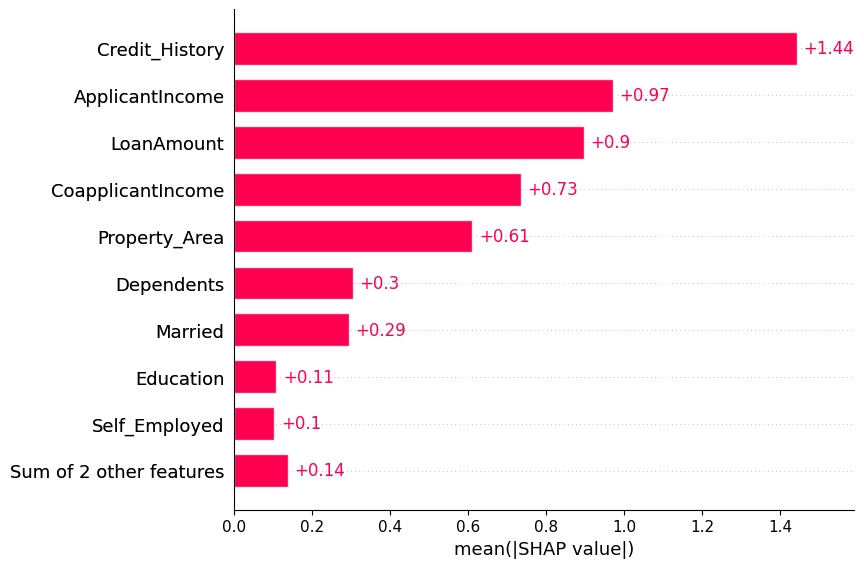

In [ ]:
explainer = shap.Explainer(xgb)
shap_values = explainer(X_train)
shap.plots.bar(shap_values)

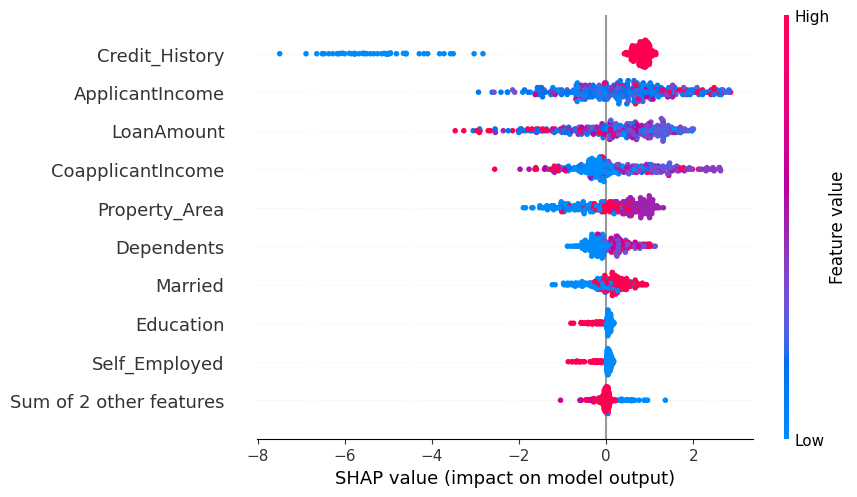

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0, :],
X_train.iloc[0])

# 3. Для каждого алгоритма визуализировать отсортированную значимость признаков.

# 4. Оценить качество моделей на всех признаках, а затем на самых значимых.